In [23]:
!pip install seaborn
!pip install statsmodels
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/18.8 MB ? eta -:--:--Downloading rasterio-1.4.3-cp311-cp311-macosx_14_0_arm64.whl (18.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 26.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 26.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [contextily]6 [rasterio]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [contextily]


In [3]:
import geopandas as gpd
# FILE PATHS, UPDATE AS NEEDED
wards = gpd.read_file("mapping_to_wards/WARD.shp")
csv_path = '/Users/ashz/Desktop/STA304/STA304-Project/wardParkingData/Parking_Tags_Data_2024_with_wards.csv'
figures_path = "/Users/ashz/Desktop/STA304/STA304-Project/stats_analysis/ash/figures_graphics/"

In [48]:
# Imports and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust this path if your notebook is in a different folder
# csv_path = '/Users/ashz/Desktop/STA304/STA304-Project/wardParkingData/Parking_Tags_Data_2024_with_wards.csv'
df = pd.read_csv(csv_path)
print('Rows loaded:', len(df))
df.head()

/var/folders/t8/582vs1ss411dmw449198qfbw0000gn/T/ipykernel_58898/680846390.py:9: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Rows loaded: 1849768


,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,city,AREA_L_CD,AREA_NAME
0,***20590,2024-10-01,3,PARK ON PRIVATE PROPERTY,75,0.0,AT,2350 DUNDAS ST W,NaN,NaN,ON,Toronto,4,Parkdale-High Park
1,***20591,2024-10-01,3,PARK ON PRIVATE PROPERTY,75,1.0,AT,2350 DUNDAS ST W,NaN,NaN,ON,Toronto,4,Parkdale-High Park
2,***31262,2024-10-01,3,PARK ON PRIVATE PROPERTY,75,352.0,AT,5229 DUNDAS ST W,NaN,NaN,ON,Toronto,3,Etobicoke-Lakeshore
3,***18262,2024-10-01,403,STOP-SIGNED HIGHWAY-RUSH HOUR,190,719.0,NR,1395 DUNDAS ST W,NaN,NaN,ON,Toronto,9,Davenport
4,***89331,2024-10-01,3,PARK ON PRIVATE PROPERTY,75,725.0,NaN,3446 DUNDAS ST W,NaN,NaN,ON,Toronto,4,Parkdale-High Park


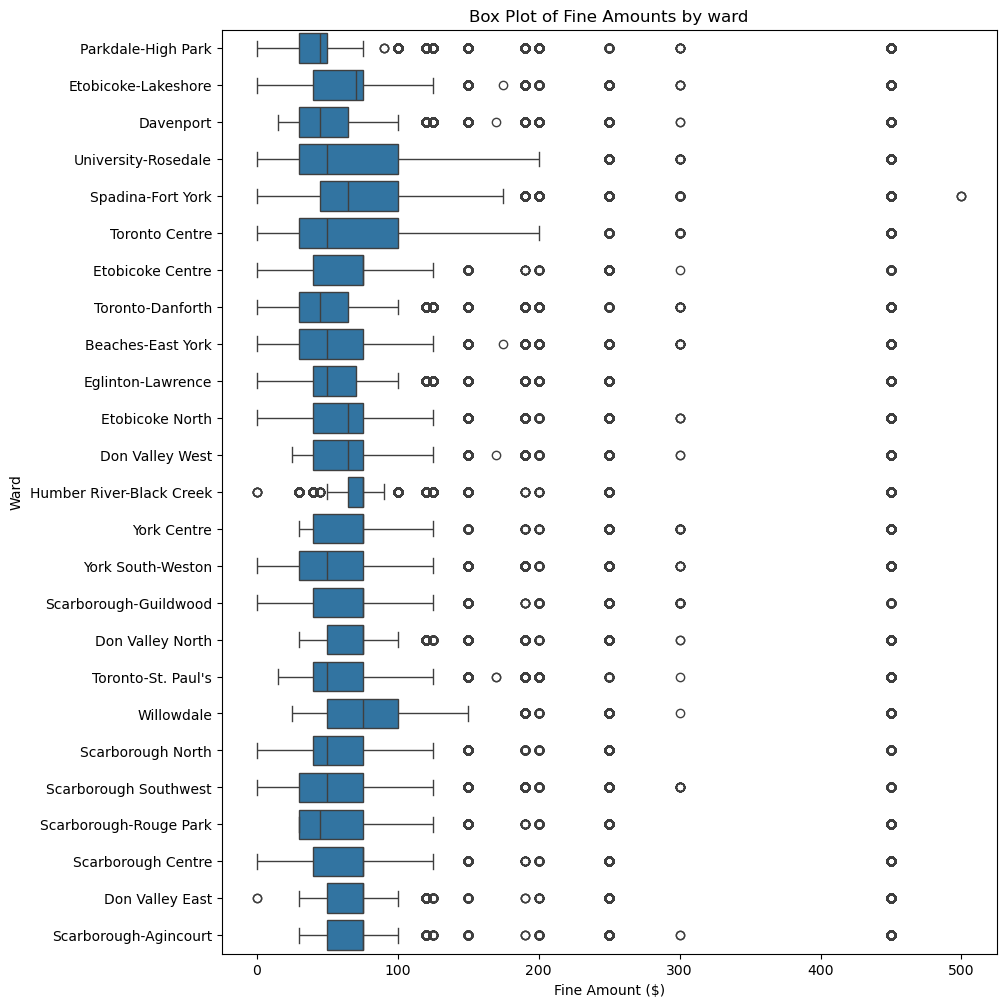

In [12]:
# Create box plot function
def create_box_plot(data,x_col, y_col, title, output_path):
    plt.figure(figsize=(10, 12))
    if x_col is None:
        sns.boxplot(y=y_col, data=data)
    else:
        sns.boxplot(x=x_col, y=y_col, data=data)
        
        
    plt.ylabel("Ward")
    #plt.xticks(rotation=90)
    plt.xlabel("Fine Amount ($)")    
    plt.title(title)
    plt.savefig(output_path)
    plt.show()
    plt.close()

# box plot for set_fine_amount by AREA_NAME
create_box_plot(df, "set_fine_amount", "AREA_NAME", "Box Plot of Fine Amounts by ward", "figures_graphics/set_fine_amount_by_area_name_boxplot.png")


/var/folders/t8/582vs1ss411dmw449198qfbw0000gn/T/ipykernel_58898/2805028133.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


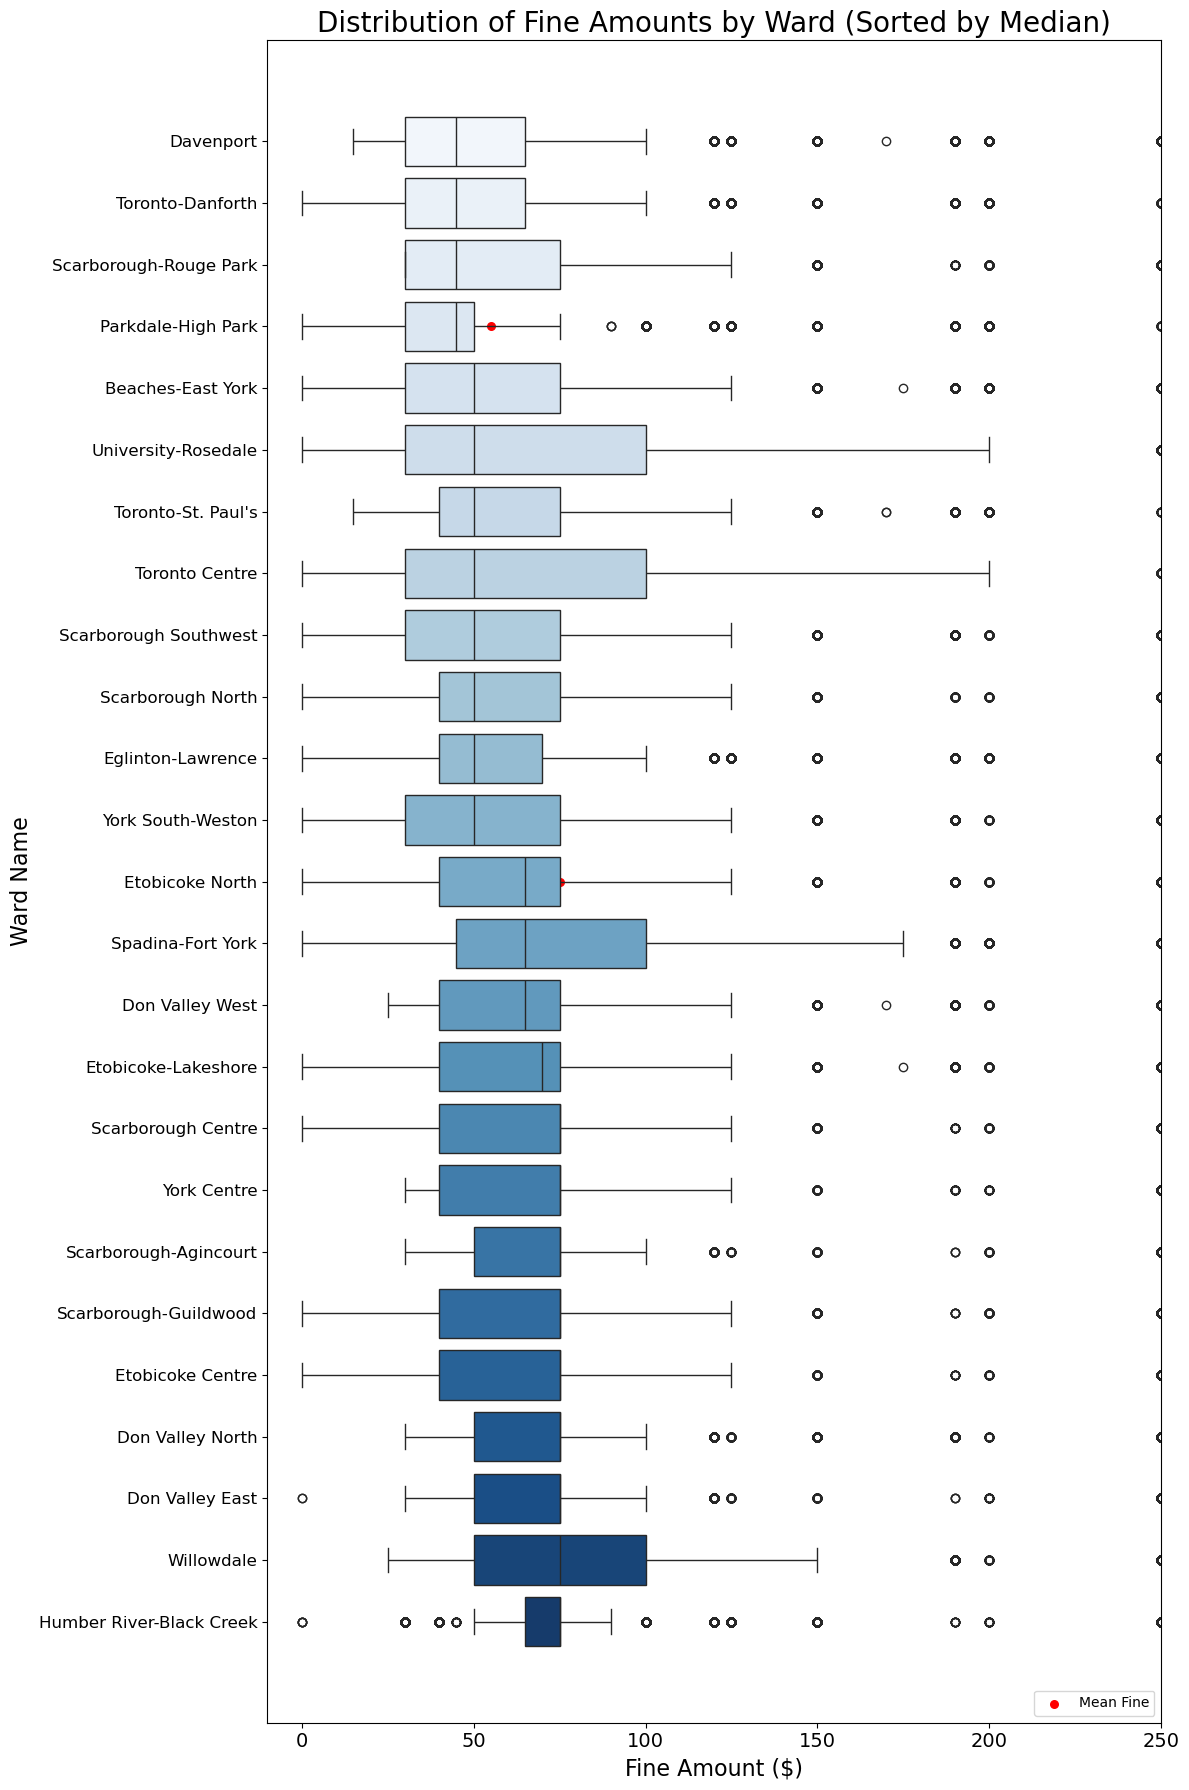

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---- Sort wards by median fine ----
median_order = (
    df.groupby("AREA_NAME")["set_fine_amount"]
      .median()
      .sort_values()
      .index
)

plt.figure(figsize=(12, 18))

sns.boxplot(
    data=df,
    x="set_fine_amount",
    y="AREA_NAME",
    order=median_order,      # <-- sorted wards
    orient="h",
    palette="Blues",         # cleaner color palette
    showfliers=True,
)

plt.xlim(-10,250)

# Add mean markers
means = df.groupby("AREA_NAME")["set_fine_amount"].mean().loc[median_order]
plt.scatter(
    means,
    range(len(means)),
    color="red",
    s=30,
    label="Mean Fine"
)



plt.title("Distribution of Fine Amounts by Ward (Sorted by Median)", fontsize=20)
plt.xlabel("Fine Amount ($)", fontsize=16)
plt.ylabel("Ward Name", fontsize=16)
plt.legend(loc="lower right")
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("figures_graphics/set_fine_amount_by_ward_horizontal_sorted.png", dpi=300)
plt.show()
plt.close()


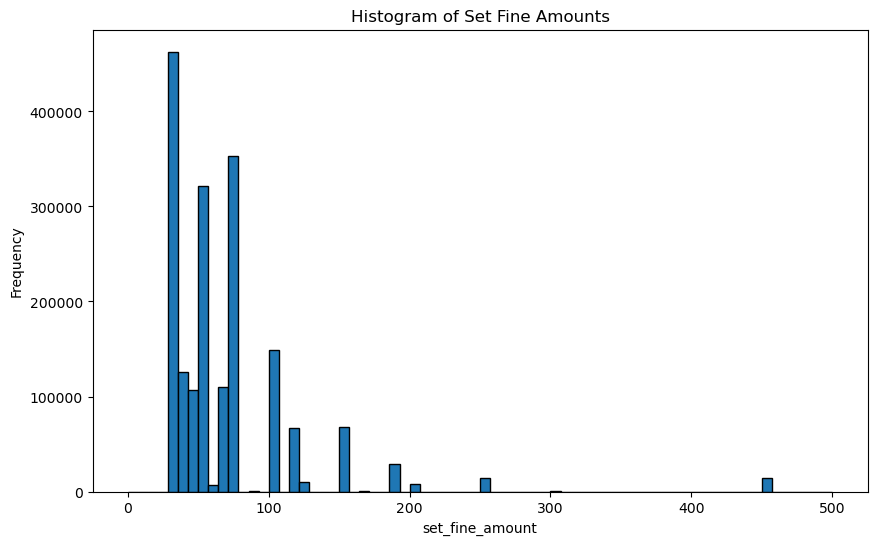

In [34]:
def create_histogram(data, col, bins, title, output_path):
    #col is the one we want to plot, like 'set_fine_amount'
    plt.figure(figsize=(10, 6))
    plt.hist(data[col], bins=bins, edgecolor='black')
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.savefig(output_path)
    plt.show()
    plt.close()
    
# histogram for set_fine_amount
create_histogram(df, "set_fine_amount", bins=70, title="Histogram of Set Fine Amounts", output_path="figures_graphics/set_fine_amount_histogram.png")

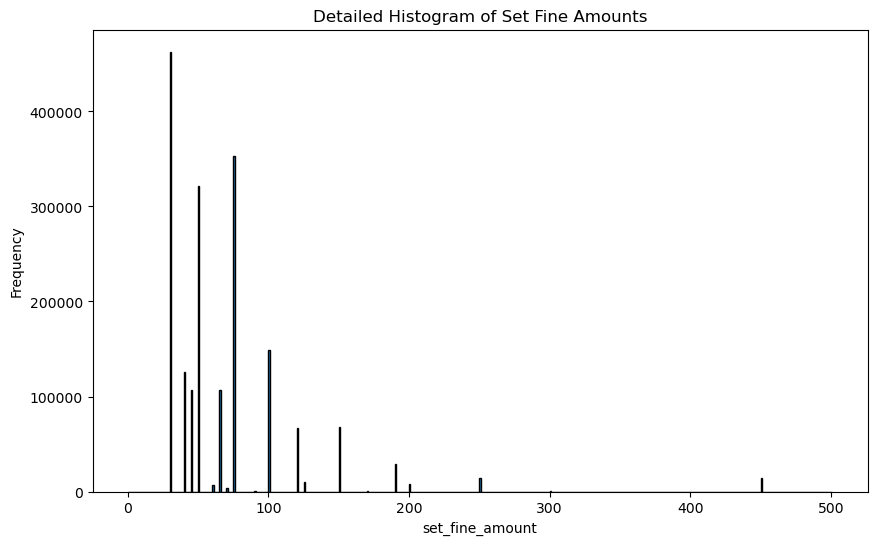

In [30]:
import numpy as np
bins = np.arange(0, df["set_fine_amount"].max() + 2, 1)

create_histogram(df, "set_fine_amount", bins=bins,
                 title="Detailed Histogram of Set Fine Amounts",
                 output_path="figures_graphics/set_fine_amount_fine_grained_histogram.png")


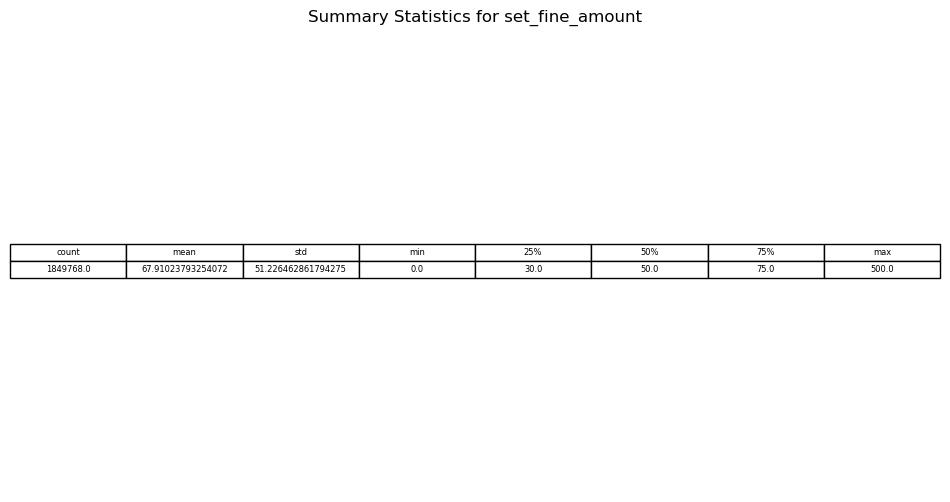

count    1.849768e+06
mean     6.791024e+01
std      5.122646e+01
min      0.000000e+00
25%      3.000000e+01
50%      5.000000e+01
75%      7.500000e+01
max      5.000000e+02
Name: set_fine_amount, dtype: float64

In [13]:
def create_summary_statistics(data, col):
    summary = data[col].describe()
    plt.figure(figsize=(12, 6))
    plt.table(cellText=[summary.values], colLabels=summary.index, loc='center', cellLoc='center')
    plt.axis('off')
    plt.title(f'Summary Statistics for {col}')
    plt.savefig(f'figures_graphics/summary_stats_{col}.png', dpi=200)
    plt.show()
    plt.close()
    return summary

# summary statistics for set_fine_amount
create_summary_statistics(df, "set_fine_amount")

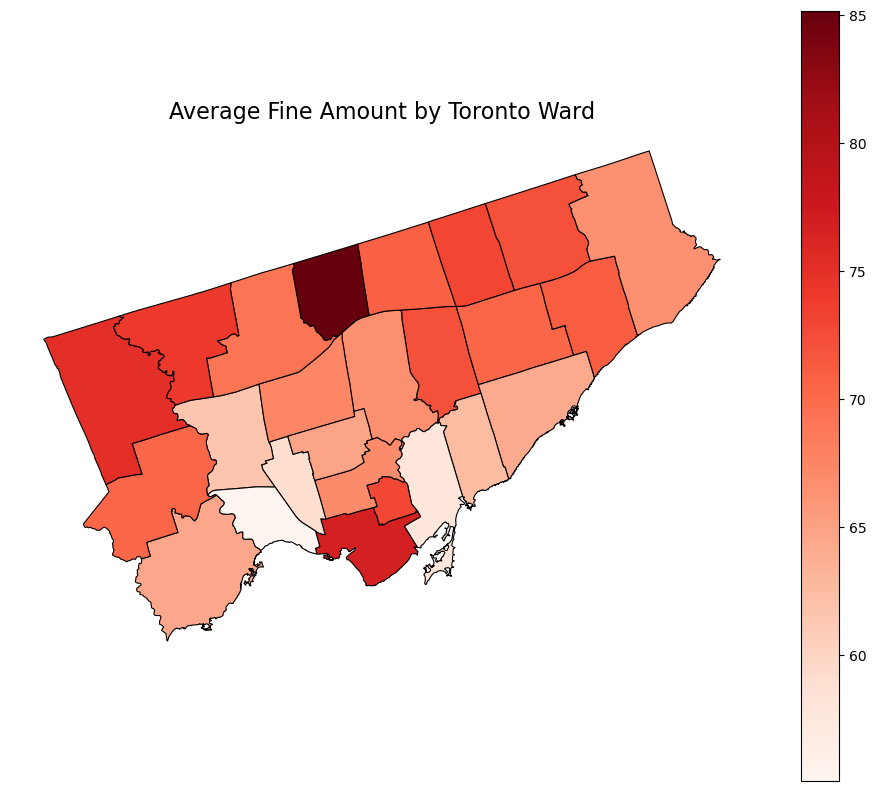

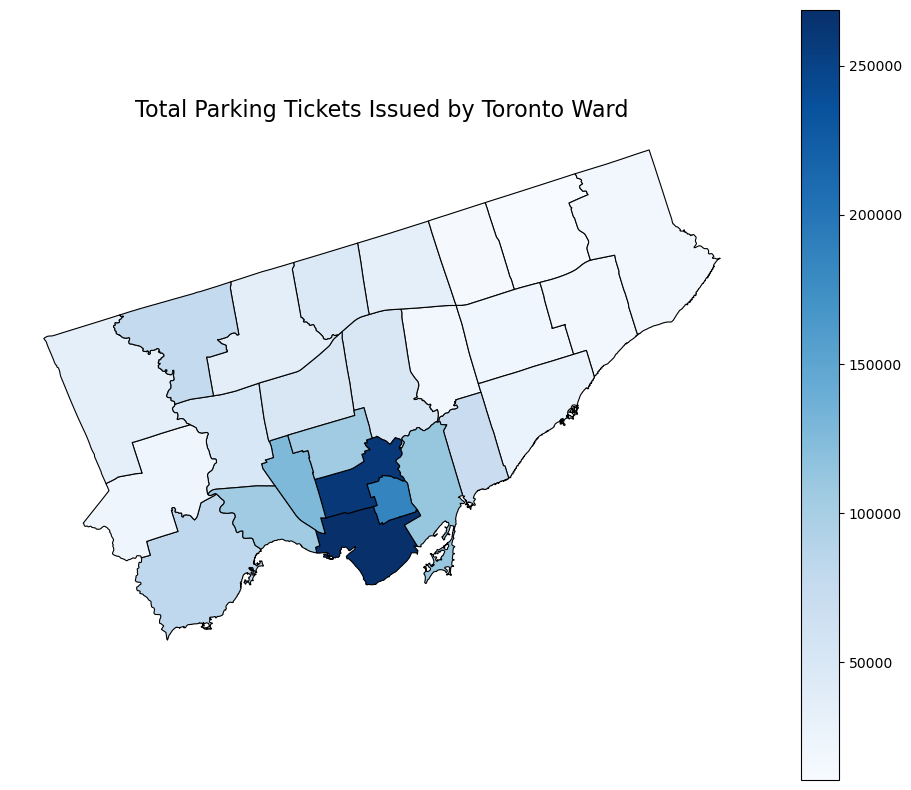

In [21]:
# Group by ward to compute the statistic
ward_stats = df.groupby("AREA_NAME").agg(
    avg_fine=("set_fine_amount", "mean"),
    total_tickets=("tag_number_masked", "count")
).reset_index()

# wards = gpd.read_file("mapping_to_wards/WARD.shp")

merged = wards.merge(ward_stats, on="AREA_NAME", how="left")

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

merged.plot(
    column="avg_fine",
    cmap="Reds",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("Average Fine Amount by Toronto Ward", fontsize=16)
ax.axis("off")

plt.savefig("figures_graphics/avg_fine_by_ward_map.png", dpi=200)
plt.show()

merged.plot(
    column="total_tickets",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    figsize=(12, 10)
)

plt.title("Total Parking Tickets Issued by Toronto Ward", fontsize=16)
plt.axis("off")

plt.savefig("figures_graphics/total_tickets_by_ward_map.png", dpi=200)
plt.show()

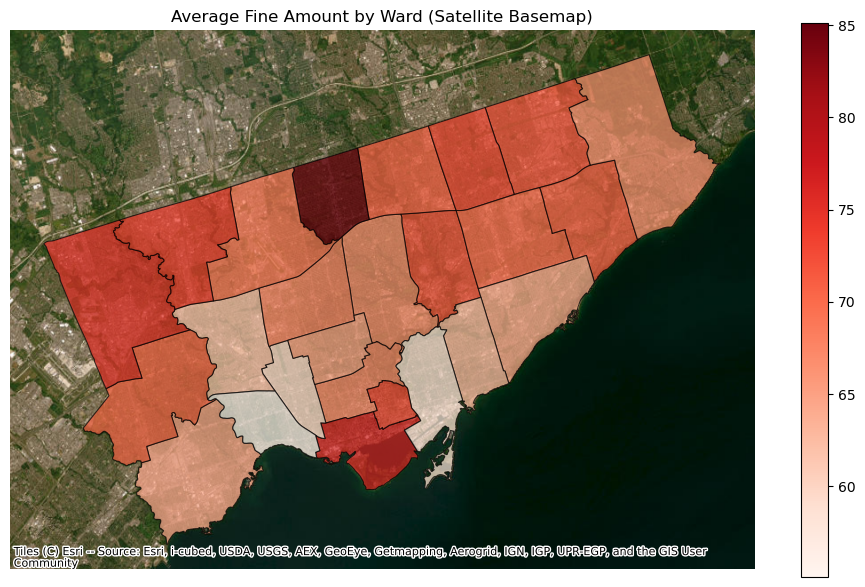

In [23]:

import contextily as cx

ward_stats = (
    df.groupby("AREA_NAME")
      .agg(avg_fine=("set_fine_amount", "mean"))
      .reset_index()
)

merged = wards.merge(ward_stats, on="AREA_NAME", how="left")

merged = merged.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))

# Plot the ward polygons colored by avg fine
merged.plot(
    column="avg_fine",
    cmap="Reds",
    linewidth=0.8,
    edgecolor="black",
    alpha=0.7,  # <- keeps the satellite layer visible
    legend=True,
    legend_kwds={'shrink': 0.6},
    ax=ax
)

# Add satellite basemap
cx.add_basemap(
    ax,
    source=cx.providers.Esri.WorldImagery   # <- satellite imagery
    # “Source: Esri, Maxar, Earthstar Geographics, and the GIS User Community.”
)

ax.set_axis_off()
plt.title("Average Fine Amount by Ward (Satellite Basemap)")
plt.savefig("figures_graphics/avg_fine_by_ward_satellite_map.png", dpi=200)
plt.show()


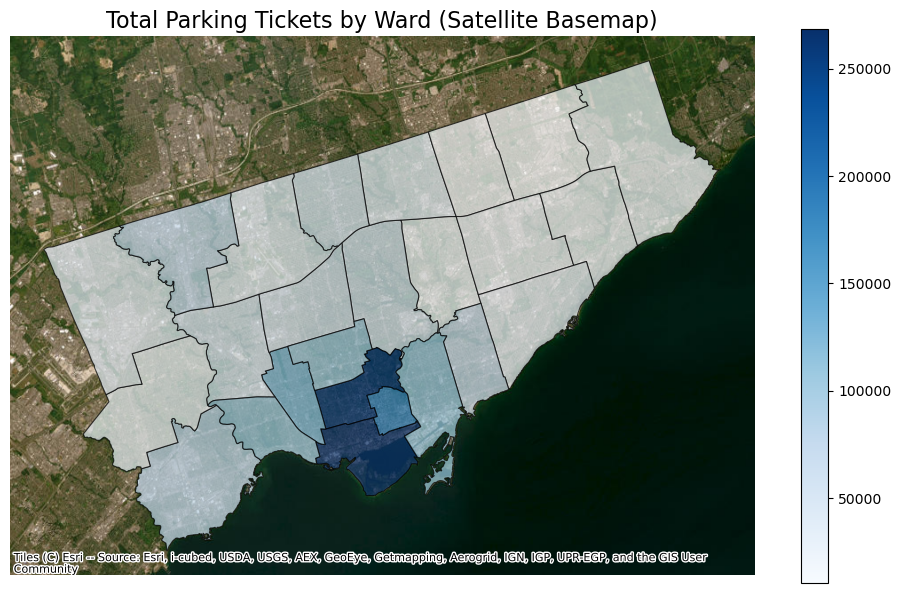

In [24]:
# --- Compute total tickets per ward ---
ward_stats = (
    df.groupby("AREA_NAME")
      .agg(total_tickets=("tag_number_masked", "count"))
      .reset_index()
)

# --- Merge stats with ward polygons ---
merged = wards.merge(ward_stats, on="AREA_NAME", how="left")

# --- Reproject to Web Mercator for basemap compatibility ---
merged = merged.to_crs(epsg=3857)


fig, ax = plt.subplots(figsize=(12, 12))

merged.plot(
    column="total_tickets",    # <-- changed
    cmap="Blues",              # <-- different color map suggestion
    linewidth=0.8,
    edgecolor="black",
    alpha=0.7,
    legend=True,
    legend_kwds={'shrink': 0.6},  # <- adjust legend size
    ax=ax
)

# Add satellite basemap
cx.add_basemap(
    ax,
    source=cx.providers.Esri.WorldImagery
)

ax.set_axis_off()
plt.title("Total Parking Tickets by Ward (Satellite Basemap)", fontsize=16)

plt.savefig("figures_graphics/total_tickets_by_ward_satellite_map.png", dpi=200)
plt.show()

In [50]:


# --- Merge multiple descriptions per infraction code ---
code_to_description = (
    df.groupby("infraction_code")["infraction_description"]
      .apply(lambda x: " | ".join(sorted(set(x.astype(str).str.strip()))))
      .to_dict()
)


# --- Loop through each infraction code ---
for infraction, description in code_to_description.items():
    print(infraction, "→", description)

    ward_stats = (
        df[df['infraction_code'] == infraction]
        .groupby(["AREA_NAME"])
        .agg(total_tickets=("tag_number_masked", "count"))
        .reset_index()
    )

    # Merge stats with ward shapefile
    merged = wards.merge(ward_stats, on="AREA_NAME", how="left")

    # Reproject for basemap
    merged = merged.to_crs(epsg=3857)

    # Plot
    fig, ax = plt.subplots(figsize=(20, 12))
    merged.plot(
        column="total_tickets",
        cmap="Blues",
        linewidth=0.8,
        edgecolor="black",
        alpha=0.7,
        legend=True,
        ax=ax
    )

    # Satellite basemap
    cx.add_basemap(
        ax,
        source=cx.providers.Esri.WorldImagery
    )

    ax.set_axis_off()

    plt.title(
        f"Total Parking Tickets by Ward (Satellite Basemap)\nInfraction Code {infraction}: {description}",
        fontsize=14
    )

    plt.savefig(
        f"/Users/ashz/Desktop/STA304/STA304-Project/stats_analysis/ash/figures_graphics/figures_by_infraction_type/total_tickets/total_tickets_by_ward_satellite_map_{infraction}.png",
        dpi=200
    )

    plt.close()


1 → PARK FAIL TO DEPOSIT FEE METER
11 → PARK/STOP RGHT WHLS > 30CM CRB
12 → PARK VEHICLE - FOR SALE
13 → PARK VEH.-WASH/GREASE/REPAIR
134 → PARK-SIGNED HWY-PUBLIC LANE
14 → PARK-OBSTRUCT (DRWAY/LANEWAY)
148 → STOP UNAUTH VEHICLE VEND AREA
15 → PARK-WITHIN 3M OF FIRE HYDRANT
158 → PARK VEHICLE IN CITY PARK
16 → PARK-WITHIN 9M INTERSECT ROAD
17 → PARK-SIGNED HWY-15M INTERSECTN
18 → PARK-30.5M SIGNALIZED INTERSCT
19 → PARK-FRONT OF BLDG ENTRY/EXIT
192 → STAND SIGNED TRANSIT STOP
2 → PARK - LONGER THAN 3 HOURS
20 → PARK-7.5M FIRE HALL SAME SIDE | STOP-7.5M FIRE HALL SAME SIDE
207 → PARK MACHINE-REQD FEE NOT PAID
208 → MOBILE ZONE - REQ FEE NOT PAID | PARK MACHINE-FAIL TO ACTIVATE
209 → PARK MACHINE-NOT IN PERMITD TM
21 → PARK-30.5M FIRE HALL OPP SIDE | STOP-30.5M FIRE HALL OPP SIDE
22 → PARK-15M FAR SIDE OF CROSSWALK
23 → PARK-30.5M APPROACH TO CRSSWLK
249 → PARK VEHICLE LONGER THAN 24HR
250 → PARK IN PARK NOT IN DESIG AREA
251 → LEAVE IN PARK NOT DESIG AREA
255 → PARK OVERNIGHT NO PERMIT


In [51]:
# --- Merge multiple descriptions per infraction code ---
code_to_description = (
    df.groupby("infraction_code")["infraction_description"]
      .apply(lambda x: " | ".join(sorted(set(x.astype(str).str.strip()))))
      .to_dict()
)


# --- Loop through each infraction code ---
for infraction, description in code_to_description.items():
    print(infraction, "→", description)

    # Compute average fine per ward *for this specific infraction code*
    ward_stats = (
        df[df["infraction_code"] == infraction]
        .groupby("AREA_NAME")
        .agg(avg_fine=("set_fine_amount", "mean"))
        .reset_index()
    )

    # Merge with ward polygons
    merged = wards.merge(ward_stats, on="AREA_NAME", how="left")

    # Reproject for basemap compatibility
    merged = merged.to_crs(epsg=3857)

    # Plot
    fig, ax = plt.subplots(figsize=(20, 12))

    merged.plot(
        column="avg_fine",
        cmap="Reds",         # red is more intuitive for $$$
        linewidth=0.8,
        edgecolor="black",
        alpha=0.7,
        legend=True,
        ax=ax
    )

    # Satellite basemap
    cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery)

    ax.set_axis_off()

    plt.title(
        f"Average Fine Amount by Ward (Satellite Basemap)\nInfraction Code {infraction}: {description}",
        fontsize=14
    )

    # Save figure
    plt.savefig(
        f"/Users/ashz/Desktop/STA304/STA304-Project/stats_analysis/ash/figures_graphics/figures_by_infraction_type/total_tickets/average_fine/avg_fine_by_ward_satellite_map_{infraction}.png",
        dpi=200
    )

    plt.close()


1 → PARK FAIL TO DEPOSIT FEE METER
11 → PARK/STOP RGHT WHLS > 30CM CRB
12 → PARK VEHICLE - FOR SALE
13 → PARK VEH.-WASH/GREASE/REPAIR
134 → PARK-SIGNED HWY-PUBLIC LANE
14 → PARK-OBSTRUCT (DRWAY/LANEWAY)
148 → STOP UNAUTH VEHICLE VEND AREA
15 → PARK-WITHIN 3M OF FIRE HYDRANT
158 → PARK VEHICLE IN CITY PARK
16 → PARK-WITHIN 9M INTERSECT ROAD
17 → PARK-SIGNED HWY-15M INTERSECTN
18 → PARK-30.5M SIGNALIZED INTERSCT
19 → PARK-FRONT OF BLDG ENTRY/EXIT
192 → STAND SIGNED TRANSIT STOP
2 → PARK - LONGER THAN 3 HOURS
20 → PARK-7.5M FIRE HALL SAME SIDE | STOP-7.5M FIRE HALL SAME SIDE
207 → PARK MACHINE-REQD FEE NOT PAID
208 → MOBILE ZONE - REQ FEE NOT PAID | PARK MACHINE-FAIL TO ACTIVATE
209 → PARK MACHINE-NOT IN PERMITD TM
21 → PARK-30.5M FIRE HALL OPP SIDE | STOP-30.5M FIRE HALL OPP SIDE
22 → PARK-15M FAR SIDE OF CROSSWALK
23 → PARK-30.5M APPROACH TO CRSSWLK
249 → PARK VEHICLE LONGER THAN 24HR
250 → PARK IN PARK NOT IN DESIG AREA
251 → LEAVE IN PARK NOT DESIG AREA
255 → PARK OVERNIGHT NO PERMIT


In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit model: fine amount ~ ward
model = smf.ols("set_fine_amount ~ C(AREA_NAME)", data=df).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq         df            F  PR(>F)
C(AREA_NAME)  9.144324e+07       24.0  1479.808353     0.0
Residual      4.762624e+09  1849743.0          NaN     NaN


In [16]:
# chi-square test for independence between ward and infraction code

import pandas as pd
import scipy.stats as stats

# Create contingency table: rows = wards, columns = infraction codes
contingency_table = pd.crosstab(df['AREA_NAME'], df['infraction_code'])

# Run chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)


Chi-square statistic: 1537792.9754372449
Degrees of freedom: 3792
p-value: 0.0


In [ ]:

# total statistics table per ward

import pandas as pd
import matplotlib.pyplot as plt

# ---- Compute ward-level statistics ----

ward_stats = (
    df.groupby("AREA_NAME")
      .agg(
          total_tickets=("tag_number_masked", "count"),
          mean_fine=("set_fine_amount", "mean"),
          median_fine=("set_fine_amount", "median"),
          std_fine=("set_fine_amount", "std"),
          unique_infractions=("infraction_code", "nunique")
      )
      .reset_index()
)

# Percent of total tickets
total_citywide = ward_stats["total_tickets"].sum()
ward_stats["percent_citywide"] = (
    (ward_stats["total_tickets"] / total_citywide) * 100
).round(4)

# Sort by total tickets
ward_stats = ward_stats.sort_values("total_tickets", ascending=False)

# ---- Create table image ----

# Custom column labels
custom_labels = [
    "Ward Name",
    "Total Tickets",
    "Mean Fine ($)",
    "Median Fine ($)",
    "Std Dev Fine ($)",
    "Unique Infraction Types",
    "Percent of Tickets"
]

fig, ax = plt.subplots(figsize=(18, len(ward_stats) * 0.4))
ax.axis('off')

table = ax.table(
    cellText=ward_stats.values,
    colLabels=custom_labels,
    cellLoc='center',
    loc='center'
)



# Make header bold
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(fontweight='bold')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.4)

output_path = "/Users/ashz/Desktop/STA304/STA304-Project/stats_analysis/ash/figures_graphics/ward_stats_table.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.close()

print(f"Saved table image as: {output_path}")


Saved table image as: /Users/ashz/Desktop/STA304/STA304-Project/stats_analysis/ash/figures_graphics/ward_stats_table.png


In [33]:
# total statistics table per ward, split into 3 columns each

import pandas as pd
import matplotlib.pyplot as plt

## Select ONLY the columns for the first table
table1 = ward_stats[[
    "AREA_NAME",
    "total_tickets",
    "unique_infractions",
    "percent_citywide"
]]

custom_labels1 = [
    "Ward Name",
    "Total Tickets",
    "Unique Infraction Types",
    "Percent of Tickets"
]

fig, ax = plt.subplots(figsize=(22, len(table1) * 0.5))
ax.axis('off')

table = ax.table(
    cellText=table1.values,
    colLabels=custom_labels1,
    cellLoc='center',
    loc='center'
)

# Bold header
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(fontweight='bold')

# Increase font size
table.auto_set_font_size(False)
table.set_fontsize(15)      # <-- adjust here
table.scale(1, 2.0)

output_path = f"{figures_path}half_ward_stats_table1.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.close()

print("Saved:", output_path)


# Select ONLY the columns for the second table
table2 = ward_stats[[
    "AREA_NAME",
    "mean_fine",
    "median_fine",
    "std_fine"
]]

custom_labels2 = [
    "Ward Name",
    "Mean Fine ($)",
    "Median Fine ($)",
    "Std Dev Fine ($)"
]

fig, ax = plt.subplots(figsize=(22, len(table2) * 0.5))
ax.axis('off')

table = ax.table(
    cellText=table2.values,
    colLabels=custom_labels2,
    cellLoc='center',
    loc='center'
)

# Increase font size
table.auto_set_font_size(False)
table.set_fontsize(15)      # <-- adjust here
table.scale(1, 2.0)

# Bold header
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(fontweight='bold')

# table.auto_set_font_size(False)
# table.set_fontsize(10)
# table.scale(1, 1.4)

output_path = f"{figures_path}half_ward_stats_table2.png"
plt.savefig(output_path, dpi=400, bbox_inches='tight')
plt.close()

print("Saved:", output_path)




Saved: /Users/ashz/Desktop/STA304/STA304-Project/stats_analysis/ash/figures_graphics/half_ward_stats_table1.png
Saved: /Users/ashz/Desktop/STA304/STA304-Project/stats_analysis/ash/figures_graphics/half_ward_stats_table2.png


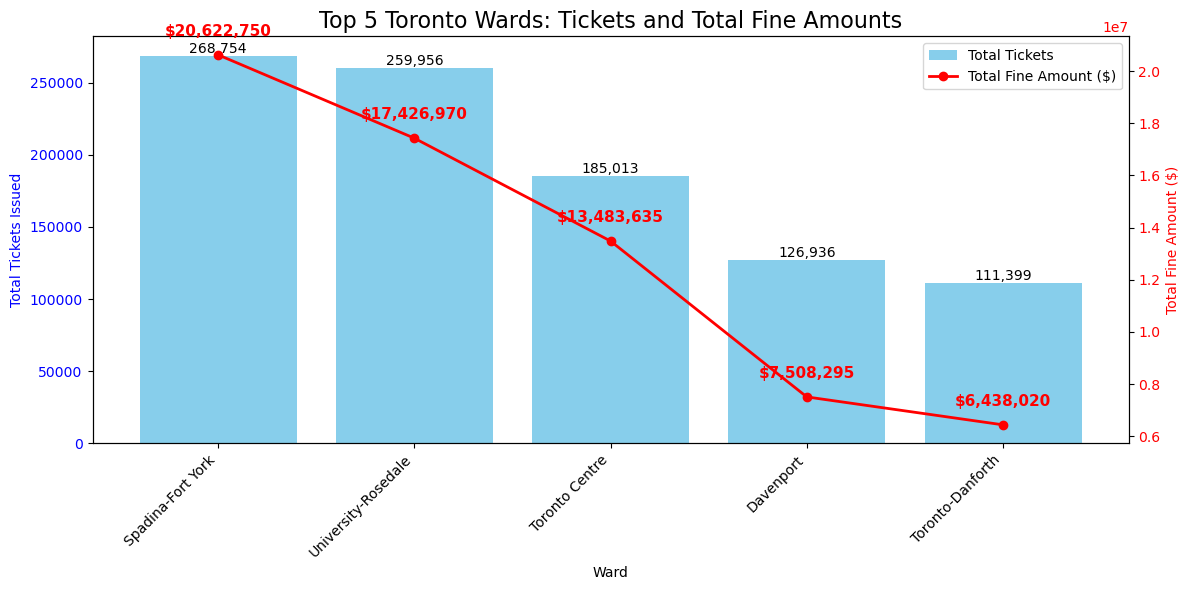

In [5]:
# bar chart of top 5 wards by total tickets
import pandas as pd
import matplotlib.pyplot as plt

# ---- Compute total tickets & total fines per ward ----
ward_stats = (
    df.groupby("AREA_NAME")
      .agg(
          total_tickets=("tag_number_masked", "count"),
          total_fines=("set_fine_amount", "sum")
      )
      .reset_index()
)

# Select top 5 by total tickets
top5 = ward_stats.sort_values("total_tickets", ascending=False).head(5)

# ---- Plot ----
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for total tickets
bars = ax1.bar(top5["AREA_NAME"], top5["total_tickets"], color='skyblue', label="Total Tickets")

ax1.set_xlabel("Ward")
ax1.set_ylabel("Total Tickets Issued", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Top 5 Toronto Wards: Tickets and Total Fine Amounts", fontsize=16)
plt.xticks(rotation=45, ha='right')

# Add labels above bars
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:,}",
        ha='center',
        va='bottom',
        fontsize=10
    )

# ---- Second axis: total fines ----
ax2 = ax1.twinx()
ax2.plot(
    top5["AREA_NAME"],
    top5["total_fines"],
    color="red",
    marker="o",
    linewidth=2,
    label="Total Fine Amount ($)"
)

ax2.set_ylabel("Total Fine Amount ($)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add labels on each point with upward offset to avoid overlap
offset = max(top5["total_fines"]) * 0.03  # 3% vertical lift

for x, y in zip(top5["AREA_NAME"], top5["total_fines"]):
    ax2.text(
        x,
        y + offset,                     # <-- shifted upward
        f"${y:,.0f}",
        color='red',
        fontsize=11,
        fontweight='bold',
        ha='center',
        va='bottom'
    )

# ---- Legend Handling ----
lines_labels = [ax1.get_legend_handles_labels(),
                ax2.get_legend_handles_labels()]

lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
plt.legend(lines, labels, loc='upper right')

plt.tight_layout()
plt.savefig(figures_path + "top5_wards_tickets_and_fines.png", dpi=300)
plt.show()




Top 3 Wards by Ticket Count: ['Spadina-Fort York', 'University-Rosedale', 'Toronto Centre']
infraction_description
PARK MACHINE-REQD FEE NOT PAID    149224
PARK PROHIBITED TIME NO PERMIT    108877
PARK-SIGNED HWY-PROHIBIT DY/TM    103900
PARK ON PRIVATE PROPERTY           71189
STOP-SIGNED HWY-PROHIBIT TM/DY     70910
dtype: int64


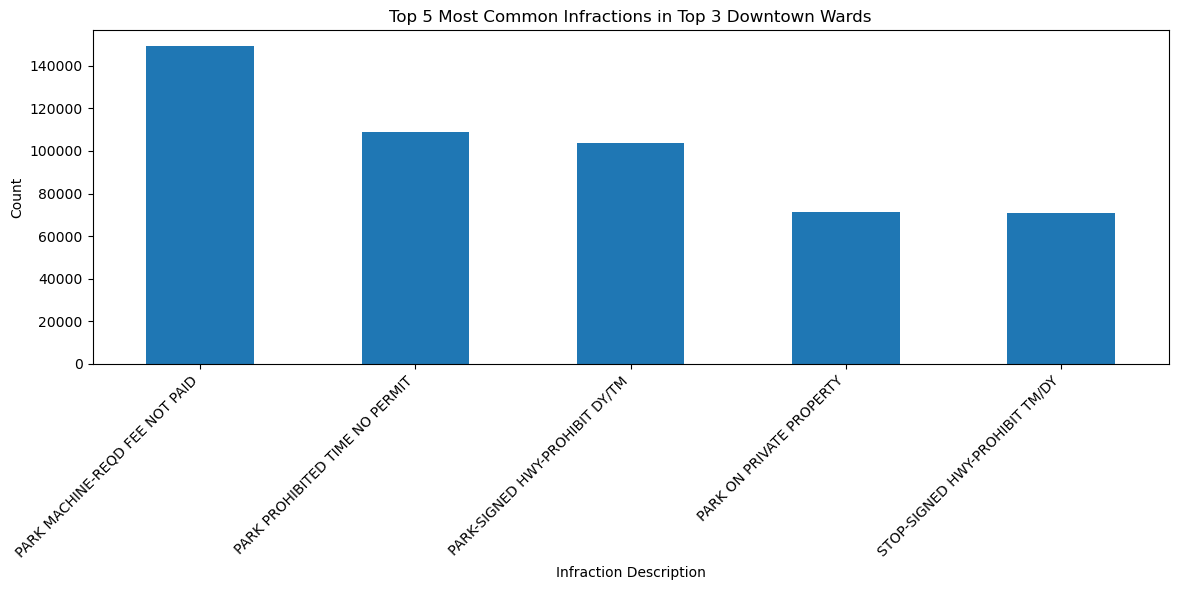

In [34]:
# Compute total tickets per ward
ward_totals = (
    df.groupby("AREA_NAME")
      .agg(total_tickets=("tag_number_masked", "count"))
      .reset_index()
)

# Select the 3 wards with most tickets
top3_wards = ward_totals.sort_values("total_tickets", ascending=False).head(3)
top3_wards_list = top3_wards["AREA_NAME"].tolist()

print("Top 3 Wards by Ticket Count:", top3_wards_list)

df_top3 = df[df["AREA_NAME"].isin(top3_wards_list)]

top5_infractions = (
    df_top3.groupby("infraction_description")
           .size()
           .sort_values(ascending=False)
           .head(5)
)

print(top5_infractions)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top5_infractions.plot(kind='bar')
plt.title("Top 5 Most Common Infractions in Top 3 Downtown Wards")
plt.xlabel("Infraction Description")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [36]:
# Filter to Willowdale
df_willowdale = df[df["AREA_NAME"] == "Willowdale"]

# Group by infraction and calculate:
# - count
# - average fine amount
top_infractions_with_fines = (
    df_willowdale
    .groupby(["infraction_code", "infraction_description"])
    .agg(
        count=("tag_number_masked", "count"),
        avg_fine=("set_fine_amount", "mean")
    )
    .sort_values("count", ascending=False)
    .head(10)   # change to 5 if you want top 5
)

print("Top Infractions in Willowdale (with avg fine):")
print(top_infractions_with_fines)



Top Infractions in Willowdale (with avg fine):
                                                count    avg_fine
infraction_code infraction_description                           
207             PARK MACHINE-REQD FEE NOT PAID  10550   36.528910
3               PARK ON PRIVATE PROPERTY         8445   75.000000
5               PARK-SIGNED HWY-PROHIBIT DY/TM   7163   56.761832
403             STOP-SIGNED HIGHWAY-RUSH HOUR    6071  167.387580
9               STOP-SIGNED HWY-PROHIBIT TM/DY   4668  109.871465
28              PARK-N.YORK 2AM-6AM DEC1-MAR31   3048   42.749344
15              PARK-WITHIN 3M OF FIRE HYDRANT   1572  109.764631
192             STAND SIGNED TRANSIT STOP        1057  168.543046
2               PARK - LONGER THAN 3 HOURS       1055   35.165877
8               STAND VEH.-PROHIBIT TIME/DAY     1048  107.538168


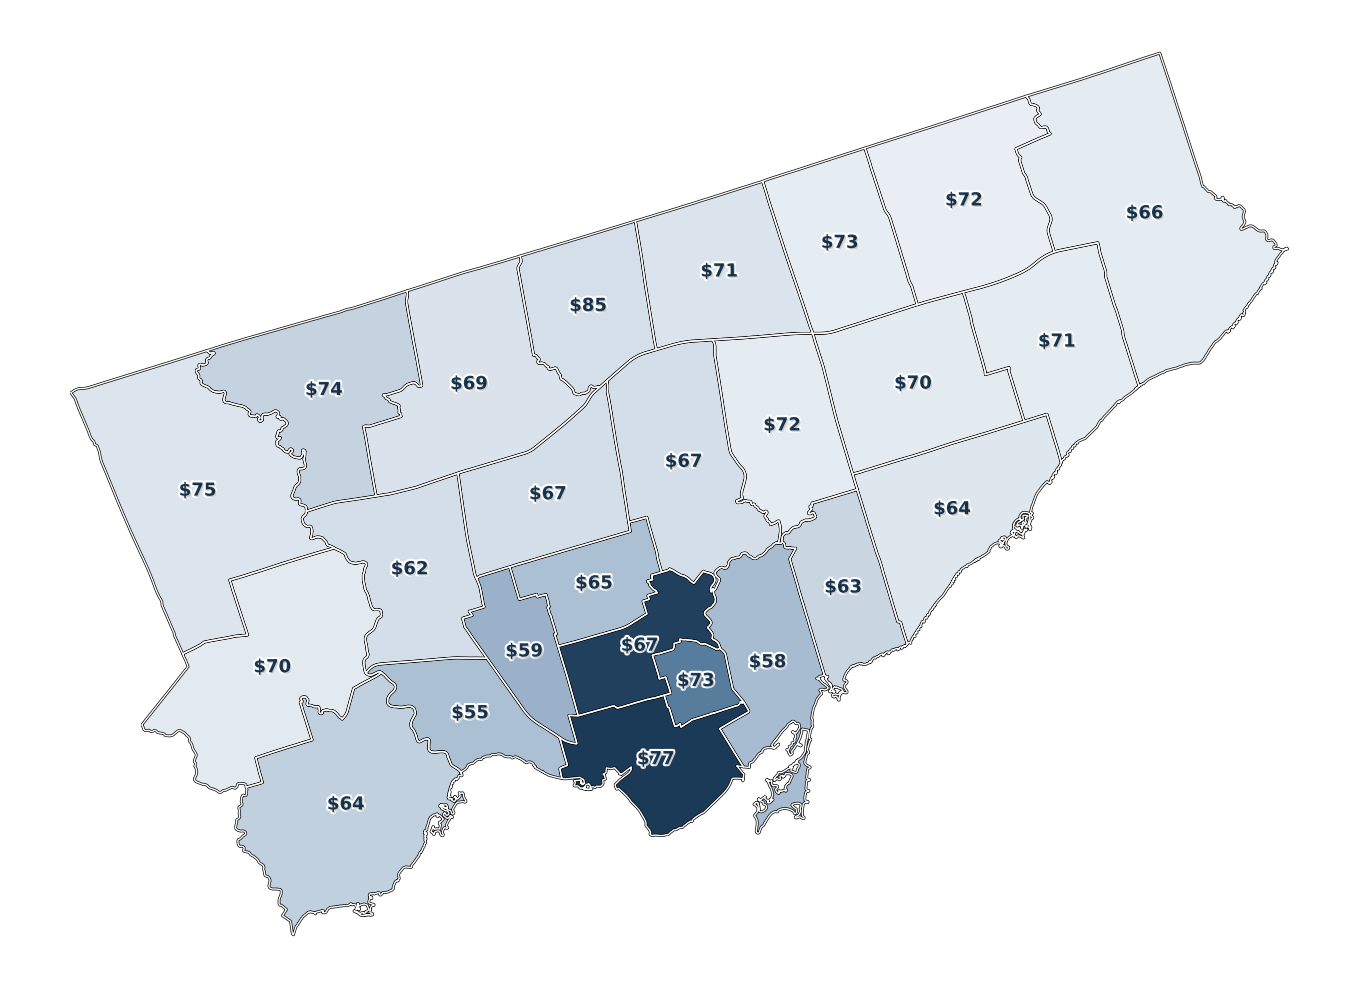

In [38]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as PathEffects

# --- Custom infographic palette ---
colors = ["#E8EEF3", "#C6D4E1", "#8FA9C3", "#416a8c", "#1B3A57"]
cmap = LinearSegmentedColormap.from_list("infographic_blue", colors)

# --- Compute avg fine per ward ---
ward_stats = (
    df.groupby("AREA_NAME")
      .agg(
          avg_fine=("set_fine_amount", "mean"),                 # label value
          total_tickets=("tag_number_masked", "count")          # shading value
      )
      .reset_index()
)

merged = wards.merge(ward_stats, on="AREA_NAME", how="left")
merged = merged.to_crs(epsg=3857)

# Compute centroids for label placement
merged["centroid"] = merged.geometry.centroid
merged["cx"] = merged.centroid.x
merged["cy"] = merged.centroid.y

# --- Begin plot: Transparent background ---
fig, ax = plt.subplots(figsize=(14, 10))

fig.patch.set_alpha(0)     # transparent figure bg
ax.set_facecolor("none")   # transparent axis bg

# 1. Fill wards (no border)
merged.plot(
    column="total_tickets",
    cmap=cmap,
    linewidth=0,
    ax=ax,
)

# 2. Add thick white boundary (visual gaps)
merged.boundary.plot(
    ax=ax,
    linewidth=2,         # thickness of gaps
    edgecolor="black"
)

# 3. Add thin black outline for clean edges
merged.boundary.plot(
    ax=ax,
    linewidth=0.99,
    edgecolor="white"
)


# 4. Add average fine labels
for _, row in merged.iterrows():
    txt = plt.text(
        row["cx"],
        row["cy"],
        f"${row['avg_fine']:.0f}",
        fontsize=13,
        ha="center",
        va="center",
        color="#1B3A57",
        fontweight="bold"
    )
    
    # Soft drop shadow + stroke outline
    txt.set_path_effects([
        PathEffects.withStroke(linewidth=3, foreground="white"),      # outline
        PathEffects.SimplePatchShadow(offset=(1, -1), shadow_rgbFace="black", alpha=0.2)
    ])

# Title
ax.set_axis_off()
plt.tight_layout()

# --- Save as transparent PNG ---
plt.savefig(
    "figures_graphics/avg_fine_map_transparent.png",
    dpi=500,
    transparent=True,     # <-- full transparency
    bbox_inches="tight",
    pad_inches=0
)

plt.show()



In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as PathEffects

# --- custom palette like your example ---
colors = ["#0E2F44", "#1B3A57", "#416A8C", "#8FA9C3", "#E8EEF3"]
cmap = LinearSegmentedColormap.from_list("inf_palette", colors)


# --- Prepare data ---
ward_stats = (
    df.groupby("AREA_NAME")
      .agg(avg_fine=("set_fine_amount", "mean"))
      .reset_index()
)

merged = wards.merge(ward_stats, on="AREA_NAME", how="left")
merged = merged.to_crs(epsg=3857)

# Precompute centroids once
merged["centroid"] = merged.geometry.centroid
merged["cx"] = merged.centroid.x
merged["cy"] = merged.centroid.y


# --- Create one map per ward ----
for idx, row in merged.iterrows():

    ward_name = row["AREA_NAME"]
    avg_fine = row["avg_fine"]
    
    # isolate only this ward as a GeoDataFrame
    g = gpd.GeoDataFrame([row], crs=merged.crs)

    fig, ax = plt.subplots(figsize=(8, 10))
    fig.patch.set_alpha(0)
    ax.set_facecolor("none")

    # fill ward polygon
    g.plot(
        ax=ax,
        color="#1B3A57",        # deep blue fill
        edgecolor="#0A1F2D",    # darker outline
        linewidth=2
    )

    # add the avg fine text
    txt = plt.text(
        row["cx"], row["cy"],
        f"${avg_fine:.0f}",
        ha="center", va="center",
        fontsize=28,
        fontweight="bold",
        color="#E8EEF3"         # white-blue like your example
    )

    # soft outline + drop shadow
    txt.set_path_effects([
        PathEffects.withStroke(linewidth=6, foreground="black", alpha=0.4),
        PathEffects.withStroke(linewidth=2, foreground="white")
    ])

    ax.set_axis_off()

    plt.tight_layout()

    # output filename
    out = f"figures_graphics/ward_single_maps/{ward_name.replace(' ', '_')}.png"
    plt.savefig(out, dpi=300, transparent=True, bbox_inches="tight", pad_inches=0)
    plt.close()

    print("Saved:", out)


Saved: figures_graphics/ward_single_maps/Don_Valley_East.png
Saved: figures_graphics/ward_single_maps/Etobicoke-Lakeshore.png
Saved: figures_graphics/ward_single_maps/Don_Valley_West.png
Saved: figures_graphics/ward_single_maps/Scarborough_North.png
Saved: figures_graphics/ward_single_maps/University-Rosedale.png
Saved: figures_graphics/ward_single_maps/Spadina-Fort_York.png
Saved: figures_graphics/ward_single_maps/Davenport.png
Saved: figures_graphics/ward_single_maps/York_South-Weston.png
Saved: figures_graphics/ward_single_maps/Don_Valley_North.png
Saved: figures_graphics/ward_single_maps/Eglinton-Lawrence.png
Saved: figures_graphics/ward_single_maps/Etobicoke_Centre.png
Saved: figures_graphics/ward_single_maps/Etobicoke_North.png
Saved: figures_graphics/ward_single_maps/Parkdale-High_Park.png
Saved: figures_graphics/ward_single_maps/Toronto-St._Paul's.png
Saved: figures_graphics/ward_single_maps/Scarborough-Agincourt.png
Saved: figures_graphics/ward_single_maps/Scarborough_Centre.p

In [50]:
import pandas as pd

# ---- Compute ward-level totals ----
ward_stats = (
    df.groupby("AREA_NAME")
      .agg(
          total_tickets=("tag_number_masked", "count"),
          total_fines=("set_fine_amount", "sum"),
          avg_fine=("set_fine_amount", "mean")
      )
      .reset_index()
)

# ---- Sort by ticket volume & select top 3 ----
top3 = ward_stats.sort_values("total_tickets", ascending=False).head(3)

# ---- Compute combined statistics ----
tickets_issued = top3["total_tickets"].sum()
total_fines_collected = top3["total_fines"].sum()
avg_fine_value = top3["avg_fine"].mean()

# citywide total tickets
city_total_tickets = ward_stats["total_tickets"].sum()

share_citywide = tickets_issued / city_total_tickets * 100

# ---- Print results ----
print("Top 3 Wards Statistics:\n")

print(f"🧾 Tickets issued: {tickets_issued:,}")
print(f"💰 Total fines collected: ${total_fines_collected:,.0f}")
print(f"📊 Share of citywide tickets: {share_citywide:.1f}%")
print(f"💵 Average fine: ${avg_fine_value:.0f}")


Top 3 Wards Statistics:

🧾 Tickets issued: 713,723
💰 Total fines collected: $51,533,355
📊 Share of citywide tickets: 38.6%
💵 Average fine: $72


In [49]:
import pandas as pd

# Ensure date column is parsed properly
df["date_of_infraction"] = pd.to_datetime(df["date_of_infraction"], errors="coerce")

# Filter for year 2024 only
df_2024 = df[df["date_of_infraction"].dt.year == 2024]

# Calculate total fine revenue
total_revenue_2024 = df_2024["set_fine_amount"].sum()

print(f"Total fine revenue for Toronto in 2024: ${total_revenue_2024:,.0f}")


Total fine revenue for Toronto in 2024: $125,618,185


In [56]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit linear model
model = smf.ols("set_fine_amount ~ C(AREA_NAME)", data=df).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                    sum_sq         df            F  PR(>F)
C(AREA_NAME)  9.144324e+07       24.0  1479.808353     0.0
Residual      4.762624e+09  1849743.0          NaN     NaN
